Frequency sampling:  48000
Channels 1
Complete Samplings N 1539008
secs 32.062666666666665
Timestep between samples Ts 2.0833333333333333e-05


C:\Users\Breno.Silva\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
C:\Users\Breno.Silva\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.


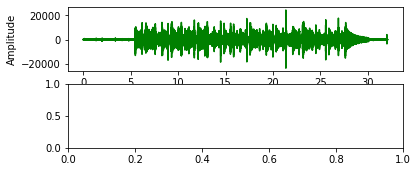

In [62]:
# TESTANDO IMPORT DE ARQUIVOS DE AUDIO E PLOTANDO O SINAL E TAMBÉM EXEMPLO DE FFT E POWER SPECTRUM

from __future__ import print_function
import scipy.io.wavfile as wavfile
import scipy
import scipy.fftpack
import numpy as np
from matplotlib import pyplot as plt

# lendo arquivo de audio
fs_rate, signal = wavfile.read("verso.wav")

print ("Frequency sampling: ", fs_rate)

# pega quantos canais (stereo (2) ou mono(1))
l_audio = len(signal.shape)
print ("Channels", l_audio)

# numero de samples
if l_audio == 2:
    signal = signal.sum(axis=1) / 2
N = signal.shape[0] #[0]
print ("Complete Samplings N", N)

# quantos segundos eh o audio
type(N)
secs = N / float(fs_rate)
print ("secs", secs)

# intervalo entre cada sample
Ts = 1.0/fs_rate
print ("Timestep between samples Ts", Ts)

# pega numpy array
t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray
FFT = abs(scipy.fft(signal))
FFT_side = FFT[range(N//2)] # one side FFT range
freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])
fft_freqs = np.array(freqs)
freqs_side = freqs[range(N//2)] # one side frequency range
fft_freqs_side = np.array(freqs_side)


plt.subplot(311)
p1 = plt.plot(t, signal, "g") # plotting the signal
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(312)

# p2 = plt.plot(freqs, FFT, "r") # plotting the complete fft spectrum
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Count dbl-sided')
# plt.subplot(313)

# p3 = plt.plot(freqs_side, abs(FFT_side), "b") # plotting the positive fft spectrum
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Count single-sided')
# plt.show()


ValueError: x and y must have same first dimension, but have shapes (1000,) and (1539008,)

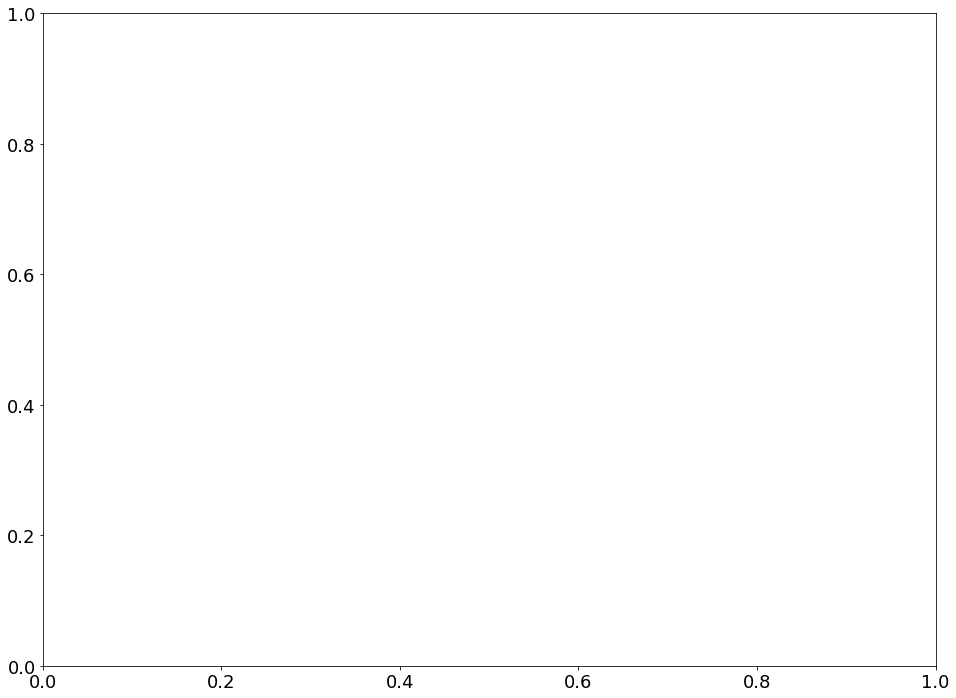

In [65]:
# EXEMPLO DE REMOCAO DE RUIDO COMECA AQUI

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size': 18})

# criar um sinal simples com duas frequencias
# aqui nos vamos substituir pelo nosso sinal de entrada teste, com o auxilio do audacity 
dt = 0.001
t = np.arange(0, 1, dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
# lendo arquivo de audio
fs_rate, signal = wavfile.read("verso.wav")
#f_clean = f

# adiciona ruido
# aqui nos vamos substituir pelo nosso sinal de ruido, com o auxilio do audacity 
f = f + 2.5*np.random.randn(len(t))
#fs_rate2, signal2 = wavfile.read("FINAL.wav")

# plota os graficos so para visualizar
#plt.plot(t, signal2, color='c', LineWidth=1.5, label='Noisy')
plt.plot(t, signal, color='k', LineWidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()


C:\Users\Breno.Silva\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


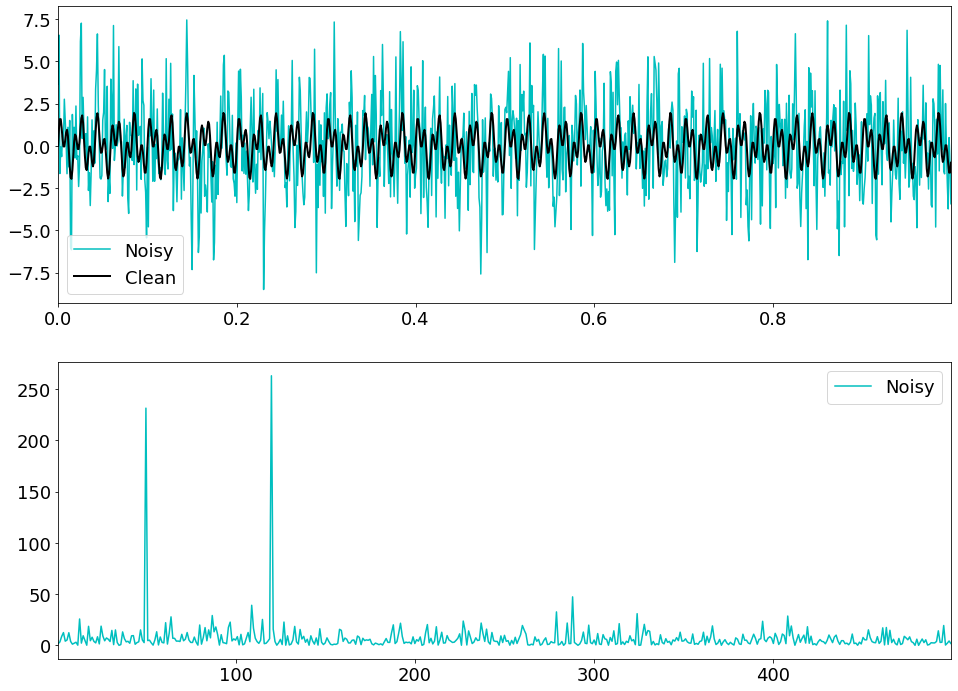

In [13]:
# computa a FFT
n = len(t)
# compute the fft
fhat = np.fft.fft(f,n)
# power sepectrum 
PSD = fhat * np.conj(fhat) / n
# create x-axis of frequencies
freq = (1/(dt*n)) * np.arange(n)
# only plot the first half of
L = np.arange(1, np.floor(n/2), dtype = 'int')

# :::::: PLOTA ::::::
fig, axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t, f, color='c', LineWidth=1.5, label='Noisy')
plt.plot(t, f_clean, color='k', LineWidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

# power spectrum density
plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color='c', LineWidth=1.5, label='Noisy')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.show()

C:\Users\Breno.Silva\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Breno.Silva\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Breno.Silva\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


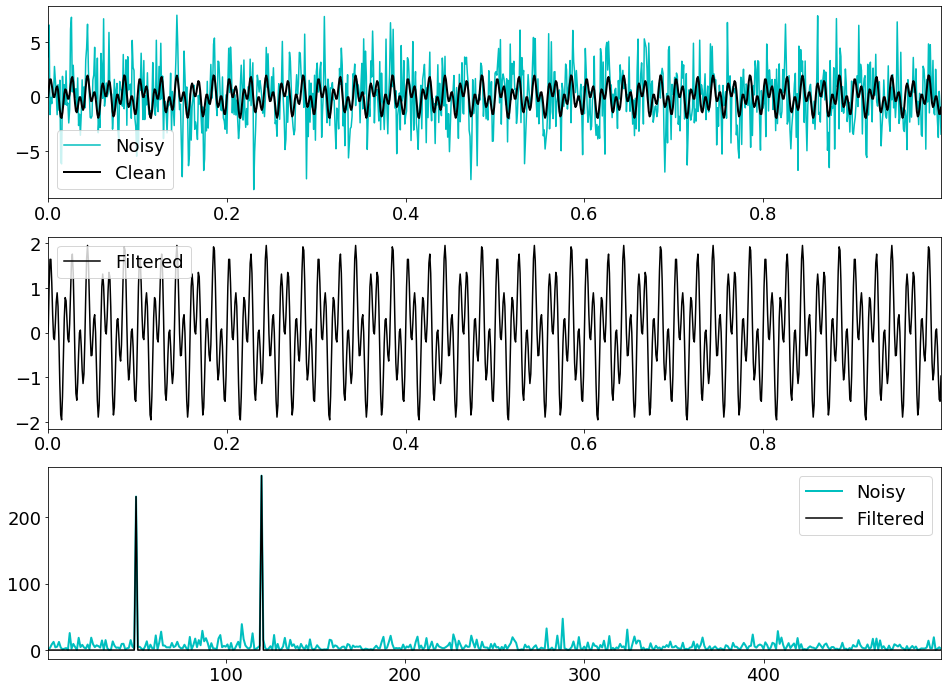

In [15]:
# usa PSD (power spectre) 
indices = PSD > 100 # acha todas as frequencias maior que esse threshold
PSDclean = PSD * indices # zera as outras
fhat = indices * fhat # zera os menores coeficientes de Fourier em Y
ffilt = np.fft.ifft(fhat) # faz a FFT inversa para pegar o sinal filtrado

# ::::::::::::::: PLOTS ::::::::::::::::::::::::::
fig, axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t, f, color='c', LineWidth=1.5, label='Noisy')
plt.plot(t, f_clean, color='k', LineWidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

# power spectrum density
plt.sca(axs[1])
plt.plot(t, ffilt, color='k', LineWidth=1.5, label='Filtered')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L], PSD[L], color='c', LineWidth=2, label='Noisy')
plt.plot(freq[L], PSDclean[L], color='k', LineWidth=1.5, label='Filtered')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.show()


C:\Users\Breno.Silva\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  after removing the cwd from sys.path.


d1  720000
d2  720000
FUNFOU ADD 


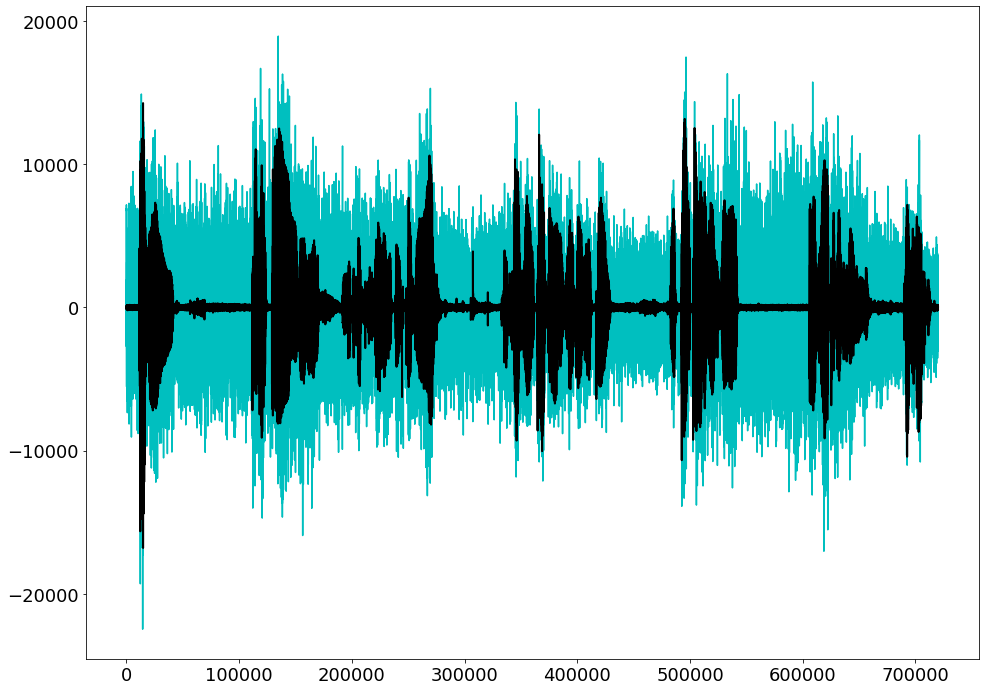

In [91]:
# VOU METER A PA


import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile # get the api
fs, data = wavfile.read('teste.wav') # load the data
fs2, data2 = wavfile.read('TRAFFIC.wav') # load the data
#data.size
print("d1 ", data.size)
print("d2 ", data2.size)
#data2.size
noisy = data + data2 
print("FUNFOU ADD ")
# # a = data.T[0] # this is a two channel soundtrack, I get the first track
# b=[(ele/2**8.)*2-1 for ele in data] # this is 8-bit track, b is now normalized on [-1,1)
# c = fft(b) # calculate fourier transform (complex numbers list)
# d = len(c)/2  # you only need half of the fft list (real signal symmetry)
# #plt.plot(abs(c[:int((d-1))]),'r')
# plt.plot(noisy,  'r')
plt.plot(noisy, color='c', LineWidth=1.5, label='Noisy')
plt.plot(data, color='k', LineWidth=2, label='Clean')
plt.show()